In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter

from nltk import FreqDist, word_tokenize

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import collections, numpy

In [3]:
df= pd.read_csv('anger.csv') 

In [4]:
print("Missing dataset value in all : ",df.isnull().values.any())

Missing dataset value in all :  True


In [5]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
3,anger,"Dari sekian banyak thread yang aku baca, threa..."
4,anger,"Contoh mereka yg gemar menyudutkan, teriak pal..."


In [6]:
df.shape

(2308, 2)

In [7]:
print('Jumlah kolom pada dataset:  ', len(df.columns))
print('Jumlah baris pada dataset:  ', len(df))

Jumlah kolom pada dataset:   2
Jumlah baris pada dataset:   2308


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


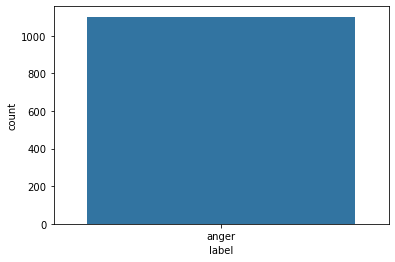

In [8]:
sns.countplot(df['label'],label="Count") #Grafik pada kolom label
plt.show() 

In [9]:
collections.Counter(df['label'])

Counter({'anger': 1101, nan: 1207})

In [12]:
df['tweet'][21]

'Nah ini, yg nunggu anak anteng dengan kesabaran seluas samudra trus bapaknya dateng2 bikin anak nangis. Hmmm kuingin marah melampiaskan'

In [20]:
def case_folding(tweet):  
    tweet = str(tweet).lower()
    return tweet
df['tweet']= df['tweet'].apply(case_folding)  

In [21]:
df.head()

,label,tweet
0,anger,"soal jln jatibaru,polisi tdk bs gertak gubernu..."
1,anger,"sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,anger,"jln jatibaru,bagian dari wilayah tn abang.peng..."
3,anger,"dari sekian banyak thread yang aku baca, threa..."
4,anger,"contoh mereka yg gemar menyudutkan, teriak pal..."


In [23]:
def clean_tweet(tweet):
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', ' ', tweet)
    
    # remove number
    tweet = re.sub(r'[0-9]+', '', tweet)
    
    #remove url 
    tweet = re.sub("url", "", tweet)
    
    #remove username 
    tweet = re.sub('username', '', tweet)
    
    #remove sensitiveno
    tweet = re.sub('sensitiveno', '', tweet)
    
    #remove URL 
    tweet = re.sub("https", "", tweet)
    
    # remove askfm
    tweet = re.sub('askfm', '', tweet)
    
    #remove double spasi
    tweet= " ".join(tweet.split())    
    return tweet
df['tweet']= df['tweet'].apply(clean_tweet)

In [ ]:
df['tweet'][2489]

In [24]:
df.head()

,label,tweet
0,anger,soal jln jatibaru polisi tdk bs gertak gubernu...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...
2,anger,jln jatibaru bagian dari wilayah tn abang peng...
3,anger,dari sekian banyak thread yang aku baca thread...
4,anger,contoh mereka yg gemar menyudutkan teriak pali...


In [25]:
key_norm = pd.read_csv('kamus_normalisasi.csv')

def normalisasi(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                      if (key_norm["singkat"] == word).any() else word for word in tweet.split()])
    return tweet
df['tweet']= df['tweet'].apply(normalisasi)

In [26]:
df.head()

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek loh sepertinya harusnya bisa lebi...
2,anger,jalan jatibaru bagian dari wilayah tanah abang...
3,anger,dari sekian banyak thread yang aku baca thread...
4,anger,contoh mereka yang gemar menyudutkan teriak pa...


In [27]:
df.head()

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek loh sepertinya harusnya bisa lebi...
2,anger,jalan jatibaru bagian dari wilayah tanah abang...
3,anger,dari sekian banyak thread yang aku baca thread...
4,anger,contoh mereka yang gemar menyudutkan teriak pa...


In [28]:
text = df['tweet'].values
y = df['label'].values

In [29]:
teks = ' '.join(text)

In [30]:
kata = nltk.tokenize.word_tokenize(teks)

In [31]:
fdist = FreqDist(kata)

In [32]:
top_words = fdist.most_common()
print(top_words)

[('nan', 1207), ('yang', 881), ('tidak', 748), ('di', 500), ('dan', 436), ('aku', 382), ('sudah', 348), ('kalau', 339), ('saja', 332), ('itu', 294), ('ya', 287), ('saya', 284), ('orang', 282), ('ini', 280), ('ada', 277), ('kamu', 271), ('masih', 253), ('sama', 238), ('mau', 228), ('nya', 213), ('tapi', 209), ('bisa', 185), ('juga', 178), ('jadi', 164), ('dia', 161), ('lagi', 157), ('hanya', 151), ('apa', 150), ('dengan', 149), ('ke', 147), ('dari', 141), ('karena', 121), ('jangan', 117), ('kok', 111), ('memang', 106), ('terus', 106), ('sih', 105), ('lain', 104), ('tahu', 100), ('untuk', 100), ('kan', 97), ('begitu', 96), ('buat', 96), ('seperti', 95), ('atau', 94), ('sampai', 93), ('bahkan', 92), ('kita', 91), ('anda', 90), ('harus', 89), ('bukan', 89), ('banyak', 88), ('lah', 84), ('bagaimana', 82), ('mereka', 82), ('banget', 81), ('pakai', 80), ('si', 76), ('semua', 74), ('punya', 73), ('lebih', 71), ('akan', 71), ('suka', 71), ('kenapa', 67), ('bikin', 64), ('belum', 63), ('begini',

In [33]:
print(fdist.tabulate(50))

    nan    yang   tidak      di     dan     aku   sudah   kalau    saja     itu      ya    saya   orang     ini     ada    kamu   masih    sama     mau     nya    tapi    bisa    juga    jadi     dia    lagi   hanya     apa  dengan      ke    dari  karena  jangan     kok  memang   terus     sih    lain    tahu   untuk     kan  begitu    buat seperti    atau  sampai  bahkan    kita    anda   harus 
   1207     881     748     500     436     382     348     339     332     294     287     284     282     280     277     271     253     238     228     213     209     185     178     164     161     157     151     150     149     147     141     121     117     111     106     106     105     104     100     100      97      96      96      95      94      93      92      91      90      89 
None


In [34]:
print("kata frek tertinggi ", fdist.max()," = ", fdist[fdist.max()])

kata frek tertinggi  nan  =  1207


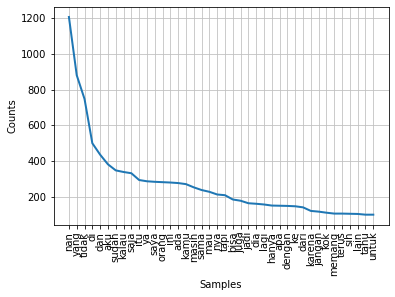

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
fdist.plot(40,cumulative=False)